In [2]:
## 学校数等の推移（中学校）
### https://www.pref.ibaraki.jp/kikaku/joho/it/opendata/od-05/010700_20190204_30gakkou.html
### 使用ファイル　：010700_20210226_nenji1-chu.csv

import pandas as pd

df = pd.read_csv('010700_20210226_nenji1-chu.csv',thousands=',', encoding="shift-jis")
df

,区分（中学校(公立・私立)）,学校数_本校[校],学校数_分校[校],学校数_中高一貫教育校(再掲)_併設型[校],学校数_中高一貫教育校(再掲)_連携型[校],学級数[学級],生徒数_計[人],生徒数_男[人],生徒数_女[人],教員数(本務者)_計[人],教員数(本務者)_男[人],教員数(本務者)_女[人],職員数(本務者)_計[人],職員数(本務者)_男[人],職員数(本務者)_女[人]
0,昭和33年度,331,5,…,…,2778,125863,63821,62042,4103,3297,806,579,194,385
1,昭和34年度,315,5,…,…,2860,124669,63441,61228,4439,3542,897,580,189,391
2,昭和35年度,301,3,…,…,3132,139962,70990,68972,4840,3860,980,582,187,395
3,昭和36年度,292,3,…,…,3474,159600,80853,78747,5260,4158,1102,602,198,404
4,昭和37年度,281,1,…,…,3655,166354,84505,81849,5532,4324,1208,611,202,409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,平成28年度,233,-,10,3,2951,80334,41046,39288,6119,3490,2629,409,116,293
59,平成29年度,230,-,10,3,2953,78426,40143,38283,6080,3475,2605,390,118,272
60,平成30年度,224,-,10,3,2901,74869,38348,36521,5876,3327,2549,377,119,258
61,令和元年度,223,-,10,2,2886,73523,37683,35840,5858,3302,2556,361,113,248


In [3]:
import numpy as np

# 和暦の年度を西暦へ変換
df['year'] = np.arange(1958, 1958+63)
df1 = df.copy()
df1['生徒百人あたり教員数[人]'] = (df['教員数(本務者)_計[人]'] / df['生徒数_計[人]'] * 100)
df1['生徒数 [千人]'] = (df['生徒数_計[人]'] / 1000)
tyuugaku = df1[['year', '学校数_本校[校]', '生徒数 [千人]','教員数(本務者)_計[人]', '生徒百人あたり教員数[人]']]
tyuugaku

,year,学校数_本校[校],生徒数 [千人],教員数(本務者)_計[人],生徒百人あたり教員数[人]
0,1958,331,125.863,4103,3.259894
1,1959,315,124.669,4439,3.560629
2,1960,301,139.962,4840,3.458081
3,1961,292,159.600,5260,3.295739
4,1962,281,166.354,5532,3.325439
...,...,...,...,...,...
58,2016,233,80.334,6119,7.616949
59,2017,230,78.426,6080,7.752531
60,2018,224,74.869,5876,7.848375
61,2019,223,73.523,5858,7.967575


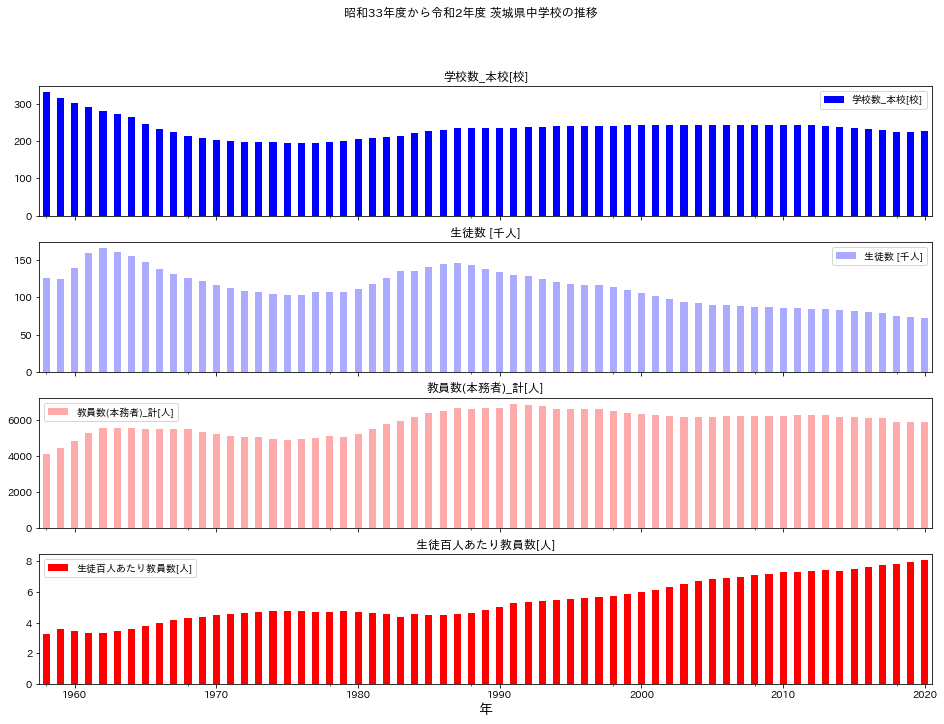

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib
xlabels = np.arange(1960, 1958+63, 10)
cmap='bwr'
tyuugaku.plot(figsize=(16,11), sharex=True,  subplots=True, kind='bar', x = 'year', 
              cmap=cmap, title="昭和33年度から令和2年度 茨城県中学校の推移",legend=True)
plt.xlabel('年', fontsize=14)
plt.xticks([2,12,22,32,42,52,62], xlabels, rotation='0')
plt.savefig("graph/茨城中学校数の推移" + cmap +".png")
plt.show()

In [31]:
tyuugaku.describe() #統計データ

,year,学校数_本校[校],生徒数 [千人],教員数(本務者)_計[人],生徒百人あたり教員数[人]
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1989.000000,234.539683,113.436317,5871.746032,5.434324
std,18.330303,27.548096,24.051842,649.727535,1.394498
min,1958.000000,195.000000,72.436000,4103.000000,3.259894
25%,1973.500000,217.500000,91.025500,5404.000000,4.525353
50%,1989.000000,236.000000,112.443000,6133.000000,4.809438
75%,2004.500000,242.000000,131.376500,6299.500000,6.776030
max,2020.000000,331.000000,166.354000,6882.000000,8.092661


### 生徒数のピーク　：　団塊の世代、　団塊ジュニア世代
### 生徒数は、1980年代後半からは緩やかに減少
### 学校数　：　団塊ジュニア世代以降はあまり減らしていない
### 教員数　：　ピークは1991年頃　
### 生徒一人あたりの教員数は増加している。